### Importing Required Libraries

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Importing and Preprocessing Data

In [26]:
(x_train_, y_train_), (x_test_, y_test_) = mnist.load_data()

filter_train = ((y_train_ == 0) | (y_train_ == 2) | (y_train_ == 5))
filter_test = ((y_test_ == 0) | (y_test_ == 2) | (y_test_ == 5))

y_train = y_train_[filter_train]; y_test = y_test_[filter_test]
y_train[y_train==2] = 1; y_train[y_train==5] = 2
y_test[y_test==2] = 1; y_test[y_test==5] = 2

x_train = x_train_[filter_train]; x_test = x_test_[filter_test];
x_train = np.expand_dims(x_train, axis=3); x_test = np.expand_dims(x_test, axis=3);
x_train = x_train.astype('float'); x_test = x_test.astype('float')

### Creatiing Model

In [30]:
class MyBlock(keras.layers.Layer):
    
    def __init__(self):
        super(MyBlock, self).__init__()
        self.conv1 = keras.layers.Conv2D(filters = 1, kernel_size = (3,3), strides=(1, 1), padding= "same")
        self.conv2 = keras.layers.Conv2D(filters = 1, kernel_size = (5,5), strides=(1, 1), padding= "same")

    def call(self, inputs):
        X1 = self.conv1(inputs)
        X2 = self.conv2(inputs)
        X = keras.layers.Concatenate(axis=3)([X1, X2])
        return X
    
Model = keras.models.Sequential([
      MyBlock(), 
      MyBlock(),
      keras.layers.Flatten(),
      keras.layers.Dense(3, activation = "softmax")
])

In [31]:
Model2 = keras.models.Sequential([
      keras.layers.Conv2D(filters = 2, kernel_size = (3,3), strides=(1, 1), padding= "valid"), 
      keras.layers.Conv2D(filters = 2, kernel_size = (5,5), strides=(1, 1), padding= "valid"),
      keras.layers.Flatten(),
      keras.layers.Dense(3, activation = "softmax")
])

### Compiling and Fitting Model

In [32]:
Model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = "Adam",
              metrics = ["accuracy"])

Model2.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = "Adam",
              metrics = ["accuracy"])

In [33]:
history_1 = Model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test), verbose = 2)

Epoch 1/100
541/541 - 8s - loss: 2.9539 - accuracy: 0.9379 - val_loss: 0.8716 - val_accuracy: 0.9652 - 8s/epoch - 14ms/step
Epoch 2/100
541/541 - 4s - loss: 0.9219 - accuracy: 0.9594 - val_loss: 0.6359 - val_accuracy: 0.9635 - 4s/epoch - 7ms/step
Epoch 3/100
541/541 - 4s - loss: 0.5810 - accuracy: 0.9620 - val_loss: 0.4251 - val_accuracy: 0.9683 - 4s/epoch - 7ms/step
Epoch 4/100
541/541 - 4s - loss: 0.4266 - accuracy: 0.9627 - val_loss: 0.4686 - val_accuracy: 0.9604 - 4s/epoch - 7ms/step
Epoch 5/100
541/541 - 5s - loss: 0.3202 - accuracy: 0.9685 - val_loss: 0.3644 - val_accuracy: 0.9604 - 5s/epoch - 8ms/step
Epoch 6/100
541/541 - 5s - loss: 0.2583 - accuracy: 0.9664 - val_loss: 0.3774 - val_accuracy: 0.9594 - 5s/epoch - 8ms/step
Epoch 7/100
541/541 - 5s - loss: 0.2245 - accuracy: 0.9672 - val_loss: 0.3060 - val_accuracy: 0.9607 - 5s/epoch - 9ms/step
Epoch 8/100
541/541 - 5s - loss: 0.1821 - accuracy: 0.9713 - val_loss: 0.2517 - val_accuracy: 0.9604 - 5s/epoch - 10ms/step
Epoch 9/100
54

541/541 - 5s - loss: 0.0618 - accuracy: 0.9798 - val_loss: 0.1112 - val_accuracy: 0.9735 - 5s/epoch - 9ms/step
Epoch 68/100
541/541 - 4s - loss: 0.0590 - accuracy: 0.9812 - val_loss: 0.0967 - val_accuracy: 0.9721 - 4s/epoch - 8ms/step
Epoch 69/100
541/541 - 4s - loss: 0.0565 - accuracy: 0.9812 - val_loss: 0.1206 - val_accuracy: 0.9635 - 4s/epoch - 8ms/step
Epoch 70/100
541/541 - 4s - loss: 0.0584 - accuracy: 0.9810 - val_loss: 0.0994 - val_accuracy: 0.9752 - 4s/epoch - 8ms/step
Epoch 71/100
541/541 - 5s - loss: 0.0536 - accuracy: 0.9820 - val_loss: 0.1030 - val_accuracy: 0.9742 - 5s/epoch - 9ms/step
Epoch 72/100
541/541 - 5s - loss: 0.0562 - accuracy: 0.9809 - val_loss: 0.1004 - val_accuracy: 0.9735 - 5s/epoch - 8ms/step
Epoch 73/100
541/541 - 5s - loss: 0.0575 - accuracy: 0.9810 - val_loss: 0.1278 - val_accuracy: 0.9628 - 5s/epoch - 8ms/step
Epoch 74/100
541/541 - 4s - loss: 0.0578 - accuracy: 0.9806 - val_loss: 0.1005 - val_accuracy: 0.9707 - 4s/epoch - 8ms/step
Epoch 75/100
541/541 

In [34]:
history_2 = Model2.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test), verbose = 2)

Epoch 1/100
541/541 - 4s - loss: 4.8756 - accuracy: 0.9215 - val_loss: 1.1828 - val_accuracy: 0.9618 - 4s/epoch - 8ms/step
Epoch 2/100
541/541 - 3s - loss: 1.0570 - accuracy: 0.9551 - val_loss: 0.6547 - val_accuracy: 0.9642 - 3s/epoch - 6ms/step
Epoch 3/100
541/541 - 3s - loss: 0.5769 - accuracy: 0.9601 - val_loss: 0.3663 - val_accuracy: 0.9635 - 3s/epoch - 6ms/step
Epoch 4/100
541/541 - 3s - loss: 0.4052 - accuracy: 0.9609 - val_loss: 0.3042 - val_accuracy: 0.9625 - 3s/epoch - 6ms/step
Epoch 5/100
541/541 - 3s - loss: 0.2919 - accuracy: 0.9638 - val_loss: 0.2980 - val_accuracy: 0.9559 - 3s/epoch - 6ms/step
Epoch 6/100
541/541 - 3s - loss: 0.2500 - accuracy: 0.9632 - val_loss: 0.2123 - val_accuracy: 0.9673 - 3s/epoch - 6ms/step
Epoch 7/100
541/541 - 3s - loss: 0.2048 - accuracy: 0.9641 - val_loss: 0.1993 - val_accuracy: 0.9628 - 3s/epoch - 6ms/step
Epoch 8/100
541/541 - 3s - loss: 0.1691 - accuracy: 0.9653 - val_loss: 0.1552 - val_accuracy: 0.9752 - 3s/epoch - 6ms/step
Epoch 9/100
541/

Epoch 67/100
541/541 - 6s - loss: 0.0640 - accuracy: 0.9787 - val_loss: 0.0893 - val_accuracy: 0.9707 - 6s/epoch - 11ms/step
Epoch 68/100
541/541 - 6s - loss: 0.0687 - accuracy: 0.9788 - val_loss: 0.0952 - val_accuracy: 0.9731 - 6s/epoch - 11ms/step
Epoch 69/100
541/541 - 6s - loss: 0.0687 - accuracy: 0.9776 - val_loss: 0.1087 - val_accuracy: 0.9697 - 6s/epoch - 11ms/step
Epoch 70/100
541/541 - 6s - loss: 0.0722 - accuracy: 0.9764 - val_loss: 0.1057 - val_accuracy: 0.9673 - 6s/epoch - 11ms/step
Epoch 71/100
541/541 - 6s - loss: 0.0634 - accuracy: 0.9793 - val_loss: 0.0921 - val_accuracy: 0.9728 - 6s/epoch - 11ms/step
Epoch 72/100
541/541 - 6s - loss: 0.0637 - accuracy: 0.9783 - val_loss: 0.1037 - val_accuracy: 0.9749 - 6s/epoch - 10ms/step
Epoch 73/100
541/541 - 5s - loss: 0.0714 - accuracy: 0.9776 - val_loss: 0.0902 - val_accuracy: 0.9694 - 5s/epoch - 10ms/step
Epoch 74/100
541/541 - 5s - loss: 0.0709 - accuracy: 0.9772 - val_loss: 0.1276 - val_accuracy: 0.9635 - 5s/epoch - 10ms/step


### Plotting Results

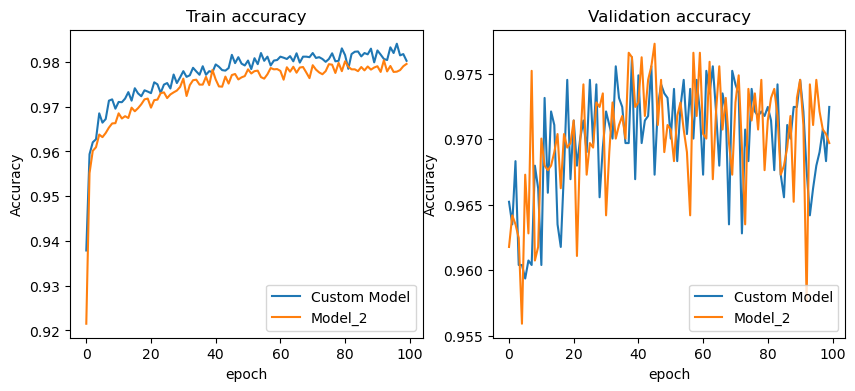

In [35]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_2.history['accuracy'])
plt.title('Train accuracy'); plt.ylabel('Accuracy'); plt.xlabel('epoch')
plt.legend(['Custom Model', 'Model_2'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Validation accuracy'); plt.ylabel('Accuracy'); plt.xlabel('epoch')
plt.legend(['Custom Model', 'Model_2'], loc='lower right')
plt.show()